### **Courts and Rinks**

In [5]:
#the imports
import pandas as pd
%matplotlib inline
import geopandas
import numpy as np
import matplotlib.pyplot as plt
import pylab
from matplotlib.colors import LinearSegmentedColormap
neighborhoods = geopandas.read_file("Neighborhoods_.shp")

Lets get a list of how many courts and rinks are in each neighborhood

In [33]:
###### read the file
courts = pd.read_csv("courts.csv", parse_dates=True)

num_courts = courts.groupby("neighborhood").size()
num_courts_sorted=num_courts.sort_values(ascending=False)
num_courts_sorted

neighborhood
Squirrel Hill South    26
Highland Park          20
Hazelwood              10
Beltzhoover             9
Brookline               9
                       ..
Perry South             1
Bon Air                 1
Upper Hill              1
Allentown               1
Middle Hill             1
Length: 63, dtype: int64

That is alot of data, lets put it in a bar chart

In [35]:
num_courts = num_courts.reset_index()
num_courts.columns = ["neighborhood", "court_count"]
#Merge
courts_map = neighborhoods.merge(num_courts, how="left", left_on="hood", right_on="neighborhood")

In [37]:
colors = [(1, 0.75, 0.8), (0.6, 0.8, 1)]  # RGB values for baby pink and baby blue
custom_cmap = LinearSegmentedColormap.from_list("baby_pink_to_blue", colors, N=len(num_courts_sorted))
colors = custom_cmap(np.linspace(0, 1, len(num_courts_sorted)))

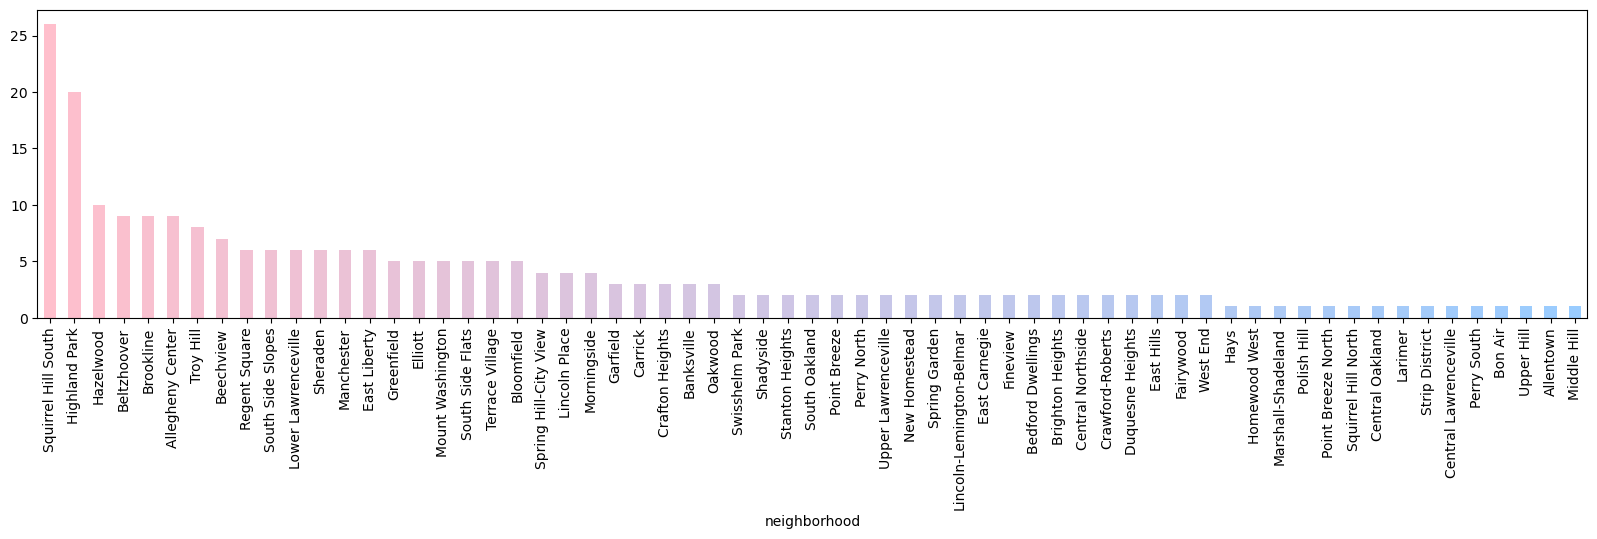

In [39]:
colors = custom_cmap(np.linspace(0, 1, len(num_courts_sorted))) #gives it the pretty color!
# Plotting the bar chart
plt.figure(figsize=(20, 4)) #how far apart each bar is
ax = plt.gca()
num_courts_sorted.plot(kind='bar', stacked=True, color=colors, x='neighborhood', y='court_count', ax=ax) #plots the map
plt.show() #shows the map

In [41]:
neighborhoods = geopandas.read_file("Neighborhoods_.shp") # read in the shapefile

<Axes: >

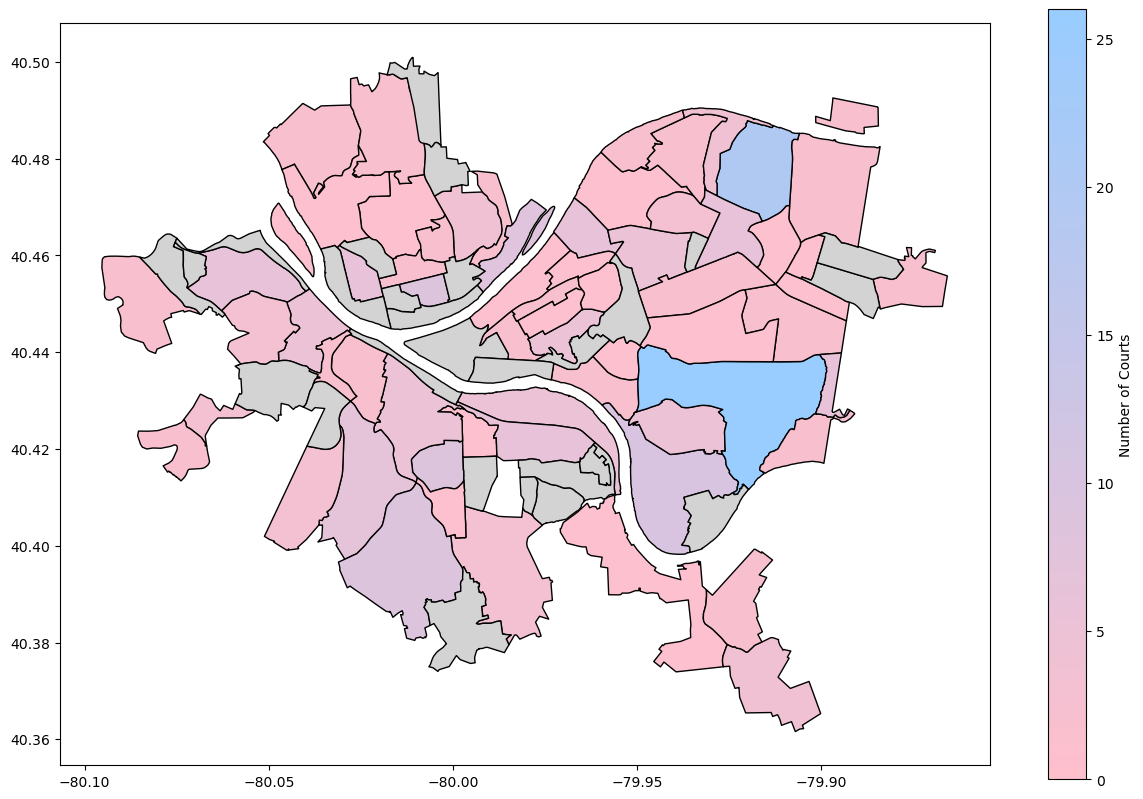

In [43]:
#creates the neighborhood plot with the merged data
courts_map.plot(column='court_count', # set the data to be used for coloring
               cmap=custom_cmap,              # choose a color palette
               edgecolor="black",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Courts"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"}, # set disctricts with no data to gray
               vmin=0)